# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


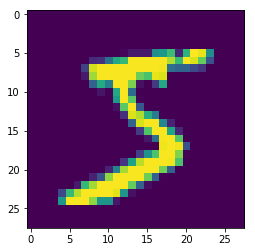

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Dropout(0.3))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))
model.add(Convolution2D(10, 1))#, activation='relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(12, (3, 3), activation='relu'))
#model.add(Dropout(0.1))
#model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 1))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        2912      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 10)          330       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=0)
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=0)
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=0)
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=0)
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

Epoch 1/10
 2048/60000 [>.............................] - ETA: 4s - loss: 0.0147 - acc: 0.9941

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 4s 63us/step - loss: 0.0102 - acc: 0.9965
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0104 - acc: 0.9963
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0106 - acc: 0.9960
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0105 - acc: 0.9961
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0097 - acc: 0.9969
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0105 - acc: 0.9964
Epoch 7/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0106 - acc: 0.9965
Epoch 8/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0095 - acc: 0.9968
Epoch 9/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0107 - acc: 0.9961
Epoch 10/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0104 - acc: 0.9965


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.02271804788911736, 0.9946]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[7.88398997e-16 3.79012655e-11 1.74145004e-11 3.39271766e-09
  2.25128513e-10 2.07625353e-13 1.00884830e-20 1.00000000e+00
  3.41852909e-14 2.64570179e-08]
 [6.68530249e-12 2.27893722e-08 1.00000000e+00 5.75178848e-13
  1.10891499e-15 3.76492455e-18 1.26218702e-10 2.61519734e-12
  1.33795908e-11 1.35200606e-16]
 [6.86328012e-15 9.99999881e-01 5.39749578e-09 5.75954388e-11
  5.16674747e-09 1.40936038e-07 5.33627621e-11 6.79655132e-09
  2.54411692e-09 1.91200202e-12]
 [9.99999642e-01 2.83673875e-16 1.17341865e-11 1.26841110e-13
  4.60374198e-13 3.52911298e-12 3.29575556e-07 3.90716756e-13
  3.51949546e-11 2.69691043e-08]
 [1.40489877e-16 1.69373326e-12 1.48707127e-15 2.00921827e-16
  1.00000000e+00 2.57065202e-13 9.79369905e-13 3.62951964e-12
  6.80893940e-14 7.78452691e-10]
 [4.32661518e-17 1.00000000e+00 2.43559528e-09 1.82838330e-14
  3.10459791e-09 5.86718521e-11 1.53997407e-13 1.37654927e-08
  1.35032849e-12 1.60006264e-12]
 [4.97188297e-21 5.62444313e-10 1.40078108e-12 4.86338509e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7ff65829dbe0>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7ff658c2d208>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7ff658c2d3c8>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7ff658c2d710>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7ff658c2d8d0>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x7ff658387208>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x7ff65835f518>,
 'conv2d_7': <keras.layers.convolutional.Conv2D at 0x7ff65830a240>,
 'conv2d_8': <keras.layers.convolutional.Conv2D at 0x7ff658370240>,
 'dropout_1': <keras.layers.core.Dropout at 0x7ff658348ef0>,
 'dropout_2': <keras.layers.core.Dropout at 0x7ff6583ae358>,
 'flatten_1': <keras.layers.core.Flatten at 0x7ff6582c9e80>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7ff6583cc7b8>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x7ff658399e80>}

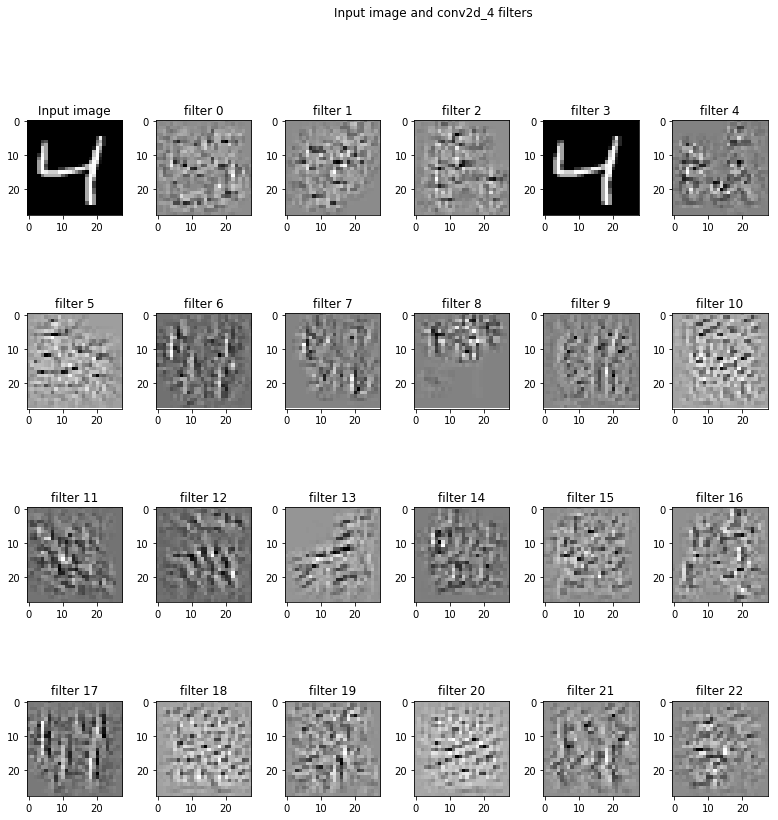

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()